# PLAY INS WORLDS


### Importan librearias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Se Lee el csv

In [2]:
df = pd.read_csv("Play-ins.csv")
print(df.head())

  Team    Player Opponent Position Champion  Kills  Deaths  Assists  \
0  UOL      Boss       GS      Top  Camille      4       5        3   
1   GS     Crazy      UOL      Top     Gwen      3       1        9   
2  UOL  Ahahacik       GS   Jungle  Trundle      2       4        5   
3   GS    Mojito      UOL   Jungle    Talon      5       4       10   
4  UOL    Nomanz       GS      Mid  Leblanc      1       3        4   

   Creep Score  Gold Earned  Champion Damage Share  Kill Participation  \
0          188        11107                   0.17                0.78   
1          217        12201                   0.20                0.52   
2          156         9048                   0.15                0.78   
3          194        11234                   0.23                0.65   
4          216         9245                   0.29                0.56   

   Wards Placed  Wards Destroyed  Ward Interactions  Dragons For  \
0             8                8                 16         

## DATA WRALING

### se verifican los tipos de datos de nuestro dataset

In [3]:
df.dtypes

Team                      object
Player                    object
Opponent                  object
Position                  object
Champion                  object
Kills                      int64
Deaths                     int64
Assists                    int64
Creep Score                int64
Gold Earned                int64
Champion Damage Share    float64
Kill Participation       float64
Wards Placed               int64
Wards Destroyed            int64
Ward Interactions          int64
Dragons For                int64
Dragons Against            int64
Barons For                 int64
Barons Against             int64
Result                    object
dtype: object

### Se conoce el total de datos

In [4]:
df.shape

(220, 20)

### Cantidad de nulos que debo remplazar

In [5]:
df.isnull().sum()

Team                     0
Player                   0
Opponent                 0
Position                 0
Champion                 0
Kills                    0
Deaths                   0
Assists                  0
Creep Score              0
Gold Earned              0
Champion Damage Share    0
Kill Participation       0
Wards Placed             0
Wards Destroyed          0
Ward Interactions        0
Dragons For              0
Dragons Against          0
Barons For               0
Barons Against           0
Result                   0
dtype: int64

### Conocer la cantidad de datos duplicados que debo reemplazar

In [6]:
df.duplicated().sum()

0

### Para mayor facilidad de obtener resultados mas precisos dividimos la columna result en win y lose

In [7]:

dummy_variable_1 = pd.get_dummies(df["Result"])
dummy_variable_1.head()

,L,W
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


### Cambiamos sus nombres de L a lose y de W a Win

In [8]:
dummy_variable_1.rename(columns={'L':'Lose', 'W':'Win'}, inplace=True)
dummy_variable_1.head()

,Lose,Win
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


### Combinamos las dos columnas con nuestro dataset y eliminamos la columna result

In [9]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("Result", axis = 1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team                   220 non-null    object 
 1   Player                 220 non-null    object 
 2   Opponent               220 non-null    object 
 3   Position               220 non-null    object 
 4   Champion               220 non-null    object 
 5   Kills                  220 non-null    int64  
 6   Deaths                 220 non-null    int64  
 7   Assists                220 non-null    int64  
 8   Creep Score            220 non-null    int64  
 9   Gold Earned            220 non-null    int64  
 10  Champion Damage Share  220 non-null    float64
 11  Kill Participation     220 non-null    float64
 12  Wards Placed           220 non-null    int64  
 13  Wards Destroyed        220 non-null    int64  
 14  Ward Interactions      220 non-null    int64  
 15  Dragon

### Para un mejor uso de los datos cambiamos el tipo de datos de estas columnas

In [11]:
df[["Lose"]] = df[["Lose"]].astype("Bool")
df[["Win"]] = df[["Win"]].astype("Bool")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team                   220 non-null    object 
 1   Player                 220 non-null    object 
 2   Opponent               220 non-null    object 
 3   Position               220 non-null    object 
 4   Champion               220 non-null    object 
 5   Kills                  220 non-null    int64  
 6   Deaths                 220 non-null    int64  
 7   Assists                220 non-null    int64  
 8   Creep Score            220 non-null    int64  
 9   Gold Earned            220 non-null    int64  
 10  Champion Damage Share  220 non-null    float64
 11  Kill Participation     220 non-null    float64
 12  Wards Placed           220 non-null    int64  
 13  Wards Destroyed        220 non-null    int64  
 14  Ward Interactions      220 non-null    int64  
 15  Dragon

## EDA

In [13]:
df.describe()

,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2.709091,2.718182,5.668182,200.340909,11008.159091,0.200000,0.608273,19.454545,8.704545,28.159091,2.090909,2.090909,0.545455,0.545455
std,2.579673,1.747179,3.888149,101.328153,3198.806207,0.095051,0.190404,15.713553,5.101614,18.051857,1.381849,1.381849,0.657050,0.657050
min,0.000000,0.000000,0.000000,14.000000,4714.000000,0.040000,0.000000,3.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,156.000000,8691.250000,0.130000,0.500000,10.000000,5.000000,17.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,3.000000,5.000000,210.000000,10454.500000,0.205000,0.625000,14.000000,7.000000,22.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,4.000000,8.000000,266.250000,13431.750000,0.260000,0.740000,19.000000,12.000000,30.500000,3.250000,3.250000,1.000000,1.000000
max,13.000000,7.000000,19.000000,419.000000,20546.000000,0.470000,1.000000,92.000000,30.000000,112.000000,4.000000,4.000000,2.000000,2.000000


### Jugadores sin asesinatos

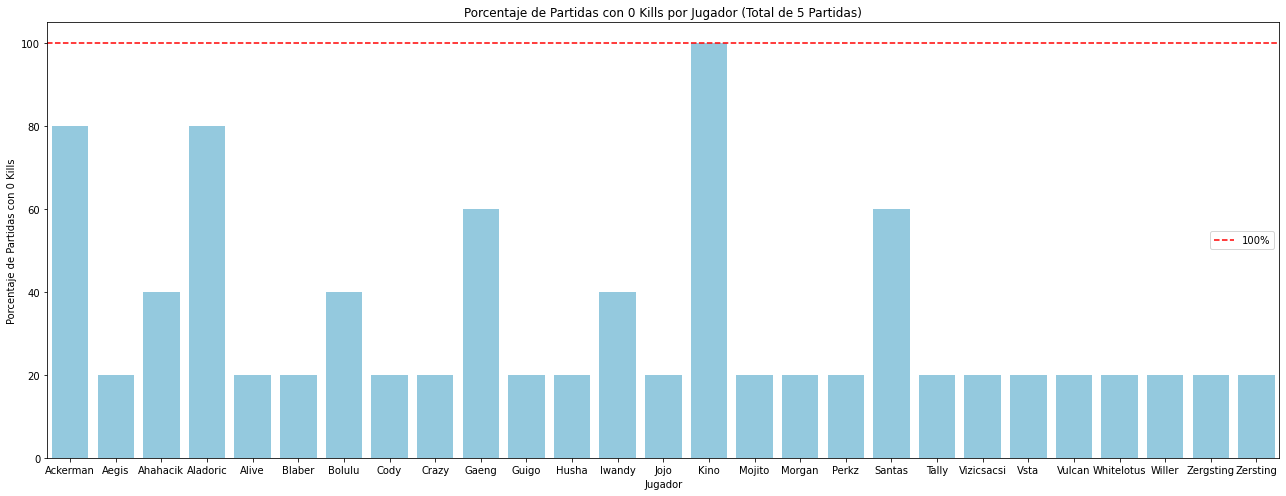

In [14]:
partidas_con_0_kills = df[df['Kills'] == 0]
conteo_partidas = partidas_con_0_kills.groupby('Player').size().reset_index(name='Conteo')

total_partidas_por_jugador = 5  # Número total de partidas por cada jugador
conteo_partidas['Porcentaje'] = (conteo_partidas['Conteo'] / total_partidas_por_jugador) * 100

plt.figure(figsize=(18, 7))
sns.barplot(x='Player', y='Porcentaje', data=conteo_partidas, color='skyblue')
plt.axhline(y=100, color='red', linestyle='--', label='100%')  # Línea de referencia al 100%

plt.xlabel('Jugador')
plt.ylabel('Porcentaje de Partidas con 0 Kills')
plt.title('Porcentaje de Partidas con 0 Kills por Jugador (Total de 5 Partidas)')

plt.legend()
plt.tight_layout()
plt.show()


### Jugadores sin asistencias

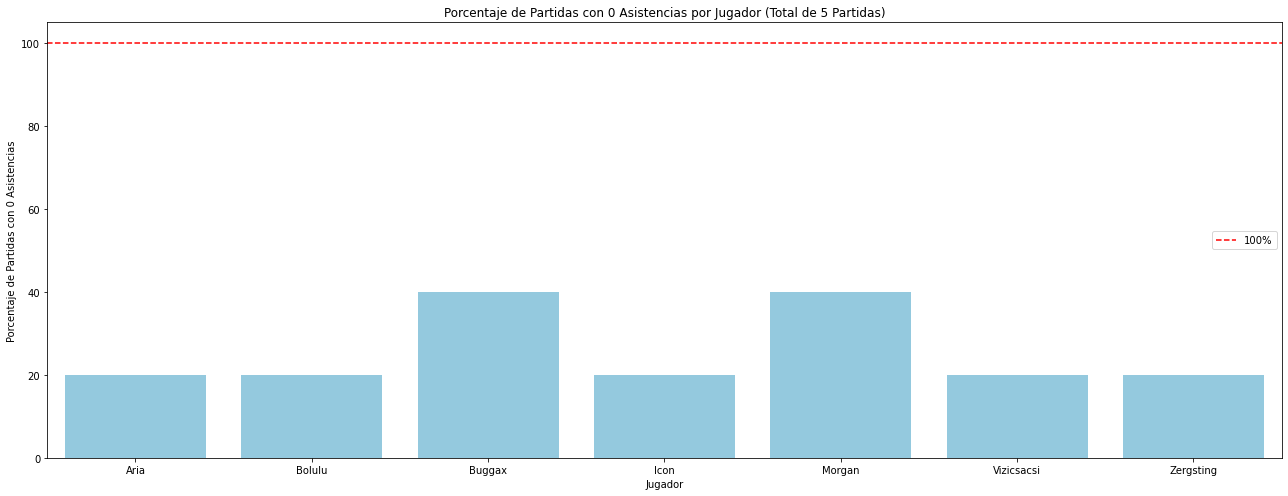

In [15]:
partidas_con_0_assists = df[df['Assists'] == 0]
conteo_partidas = partidas_con_0_assists.groupby('Player').size().reset_index(name='Conteo')

total_partidas_por_jugador = 5  # Número total de partidas por cada jugador
conteo_partidas['Porcentaje'] = (conteo_partidas['Conteo'] / total_partidas_por_jugador) * 100

plt.figure(figsize=(18, 7))
sns.barplot(x='Player', y='Porcentaje', data=conteo_partidas, color='skyblue')
plt.axhline(y=100, color='red', linestyle='--', label='100%')  # Línea de referencia al 100%

plt.xlabel('Jugador')
plt.ylabel('Porcentaje de Partidas con 0 Asistencias')
plt.title('Porcentaje de Partidas con 0 Asistencias por Jugador (Total de 5 Partidas)')

plt.legend()
plt.tight_layout()
plt.show()

### Jugadores sin muertes(Perfect)

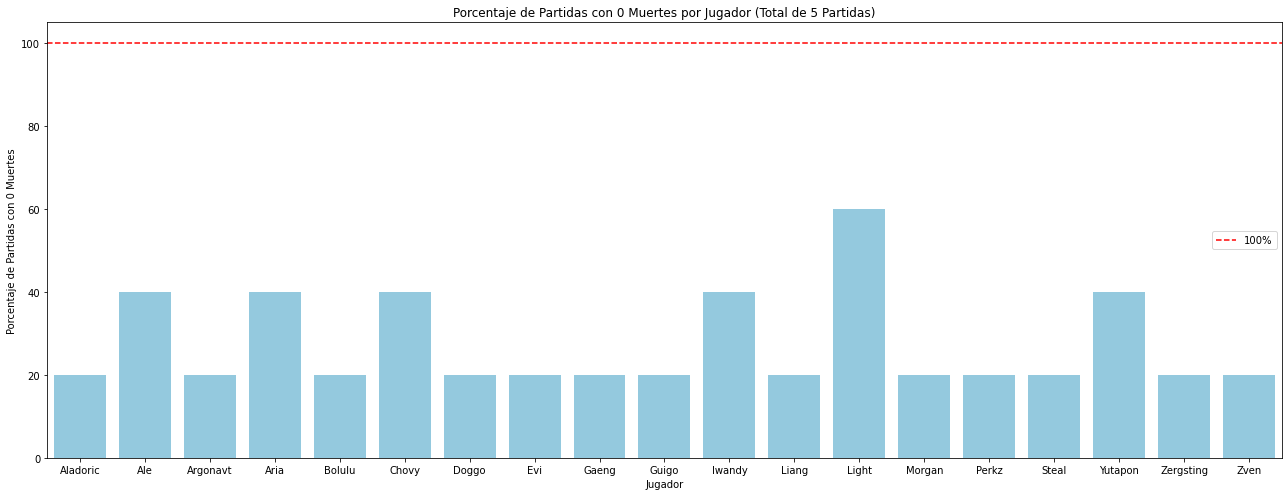

In [16]:
partidas_con_0_deaths = df[df['Deaths'] == 0]
conteo_partidas = partidas_con_0_deaths.groupby('Player').size().reset_index(name='Conteo')

total_partidas_por_jugador = 5  # Número total de partidas por cada jugador
conteo_partidas['Porcentaje'] = (conteo_partidas['Conteo'] / total_partidas_por_jugador) * 100

plt.figure(figsize=(18, 7))
sns.barplot(x='Player', y='Porcentaje', data=conteo_partidas, color='skyblue')
plt.axhline(y=100, color='red', linestyle='--', label='100%')  # Línea de referencia al 100%

plt.xlabel('Jugador')
plt.ylabel('Porcentaje de Partidas con 0 Muertes')
plt.title('Porcentaje de Partidas con 0 Muertes por Jugador (Total de 5 Partidas)')

plt.legend()
plt.tight_layout()
plt.show()

## COLUMNAS QUE SE CONSIDERAN MAS IMPORTANTES PARA GANAR LA PARTIDA


In [17]:

df[['Win', 'Lose', 'Kills', 'Assists', 'Gold Earned', 'Dragons For', 'Dragons Against', 'Barons For', 'Barons Against']].corr()

,Win,Lose,Kills,Assists,Gold Earned,Dragons For,Dragons Against,Barons For,Barons Against
Win,1.000000,-1.000000,0.427383,0.570627,0.358109,0.626411,-0.626411,0.693375,-0.693375
Lose,-1.000000,1.000000,-0.427383,-0.570627,-0.358109,-0.626411,0.626411,-0.693375,0.693375
Kills,0.427383,-0.427383,1.000000,0.056798,0.702605,0.291823,-0.246174,0.323032,-0.248090
Assists,0.570627,-0.570627,0.056798,1.000000,0.029876,0.382132,-0.277367,0.437581,-0.316690
Gold Earned,0.358109,-0.358109,0.702605,0.029876,1.000000,0.391124,-0.085474,0.462053,-0.035063
Dragons For,0.626411,-0.626411,0.291823,0.382132,0.391124,1.000000,-0.769565,0.573784,-0.356615
Dragons Against,-0.626411,0.626411,-0.246174,-0.277367,-0.085474,-0.769565,1.000000,-0.356615,0.573784
Barons For,0.693375,-0.693375,0.323032,0.437581,0.462053,0.573784,-0.356615,1.000000,-0.586538
Barons Against,-0.693375,0.693375,-0.248090,-0.316690,-0.035063,-0.356615,0.573784,-0.586538,1.000000


### SEGUN EL DATASET COMO SE DISTRIBUYEN LOS CAMPEONES POR POSICION

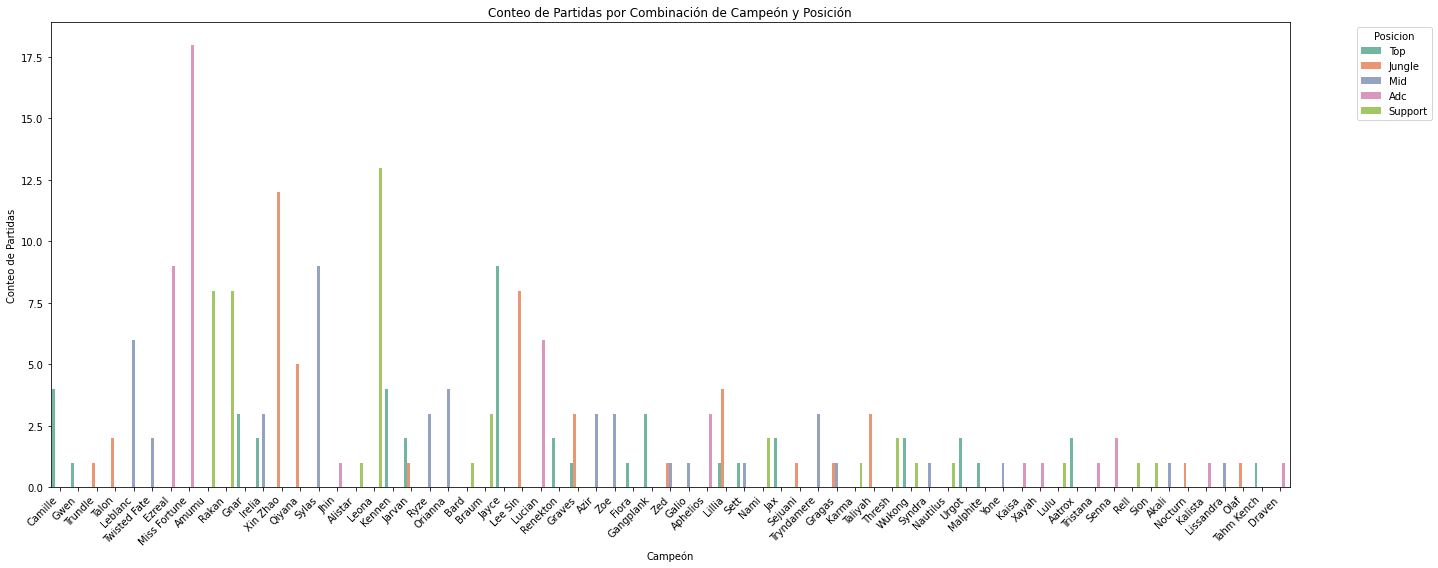

In [18]:
plt.figure(figsize=(20, 8))

# Cambié 'Champion' a 'Campeon' y 'Position' a 'Posicion' para ajustarse a las columnas de tu DataFrame
sns.countplot(x='Champion', hue='Position', data=df, palette='Set2', dodge=True)  

plt.xlabel('Campeón')
plt.ylabel('Conteo de Partidas')
plt.title('Conteo de Partidas por Combinación de Campeón y Posición')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Posicion', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### CAMPEONES CON 2 O MAS POSICIONES

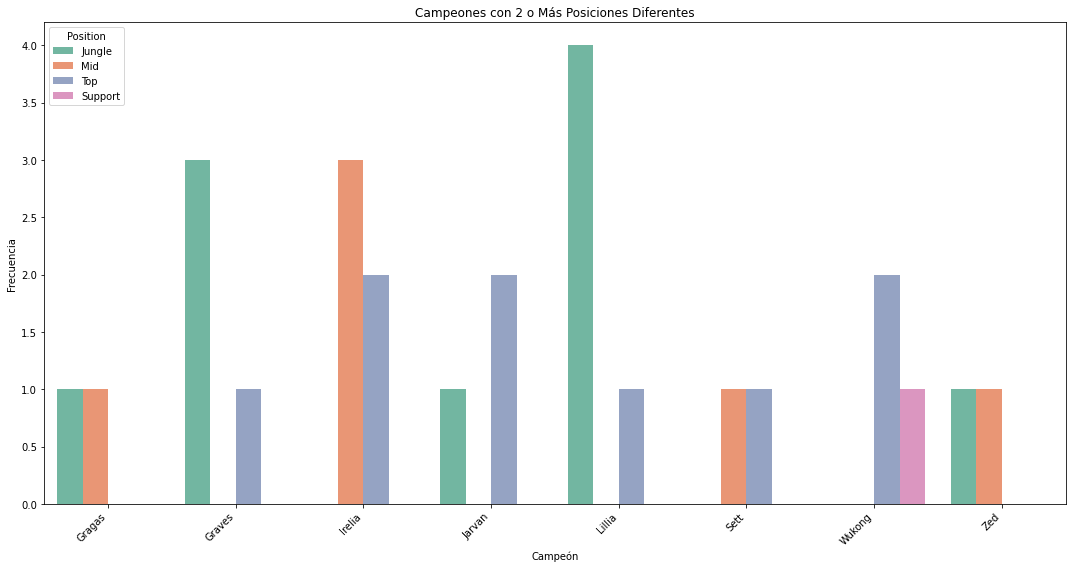

In [19]:
combinaciones_frecuencia = df.groupby(['Champion', 'Position']).size().reset_index(name='Frecuencia')
combinaciones_dos_mas_posiciones = combinaciones_frecuencia.groupby('Champion').filter(lambda x: len(x) >= 2)

plt.figure(figsize=(15, 8))
sns.barplot(x='Champion', y='Frecuencia', hue='Position', data=combinaciones_dos_mas_posiciones, palette='Set2', dodge=True)

plt.xlabel('Campeón')
plt.ylabel('Frecuencia')
plt.title('Campeones con 2 o Más Posiciones Diferentes')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Campeones con más victorias en la posicion Top


Text(0.5, 1.0, 'Campeones con Más Victorias en Top')

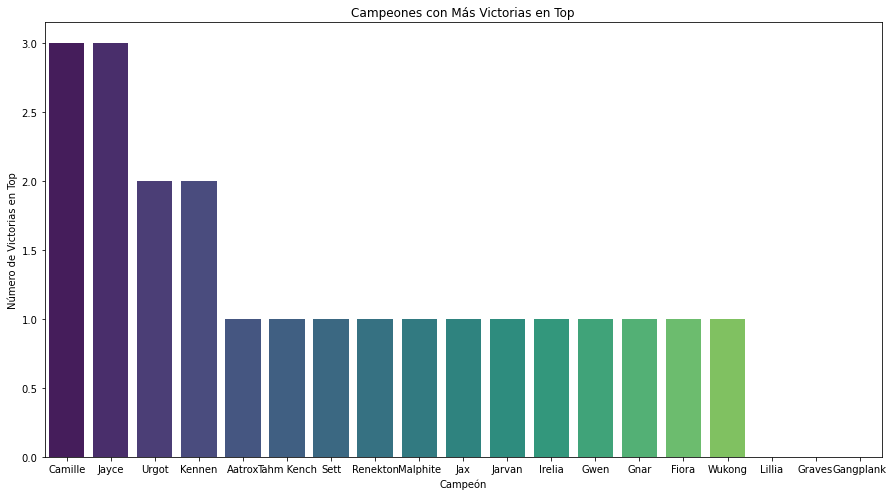

In [20]:
victorias_top = df[df['Position'] == 'Top']

campeones_mas_victorias = victorias_top.groupby('Champion')['Win'].sum().reset_index()
campeones_mas_victorias = campeones_mas_victorias.sort_values(by='Win', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Champion', y='Win', data=campeones_mas_victorias, palette='viridis')

plt.xlabel('Campeón')
plt.ylabel('Número de Victorias en Top')
plt.title('Campeones con Más Victorias en Top')


## Campeon con más victorias en la posicion de Mid

Text(0.5, 1.0, 'Campeones con Más Victorias en Mid')

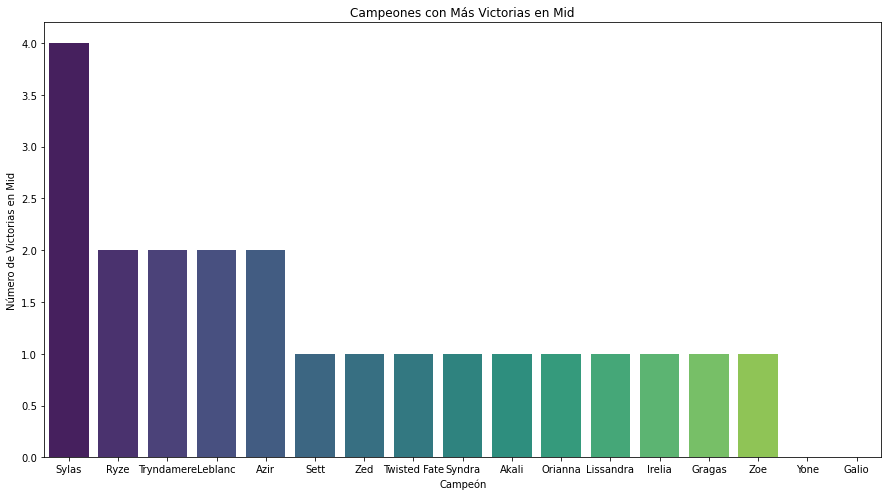

In [21]:
victorias_mid = df[df['Position'] == 'Mid']


campeones_mas_victorias_mid = victorias_mid.groupby('Champion')['Win'].sum().reset_index()
campeones_mas_victorias_mid = campeones_mas_victorias_mid.sort_values(by='Win', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Champion', y='Win', data=campeones_mas_victorias_mid, palette='viridis')

plt.xlabel('Campeón')
plt.ylabel('Número de Victorias en Mid')
plt.title('Campeones con Más Victorias en Mid')

## Campeon con más victorias en la posicion de Jungle

Text(0.5, 1.0, 'Campeones con Más Victorias en Jungla')

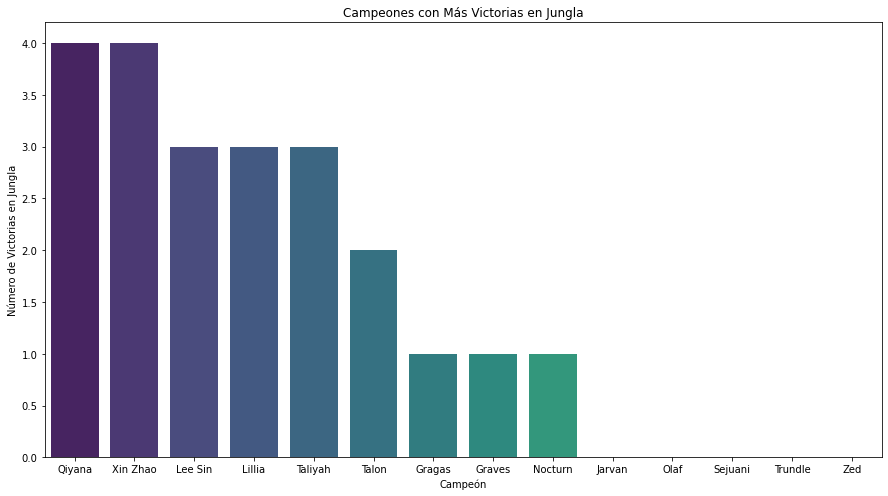

In [22]:
victorias_jungla = df[df['Position'] == 'Jungle']
campeones_mas_victorias_jungla = victorias_jungla.groupby('Champion')['Win'].sum().reset_index()
campeones_mas_victorias_jungla = campeones_mas_victorias_jungla.sort_values(by='Win', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Champion', y='Win', data=campeones_mas_victorias_jungla, palette='viridis')

plt.xlabel('Campeón')
plt.ylabel('Número de Victorias en Jungla')
plt.title('Campeones con Más Victorias en Jungla')

## Campeon con más victorias en la posicion de Adc

Text(0.5, 1.0, 'Campeones con Más Victorias en Adc')

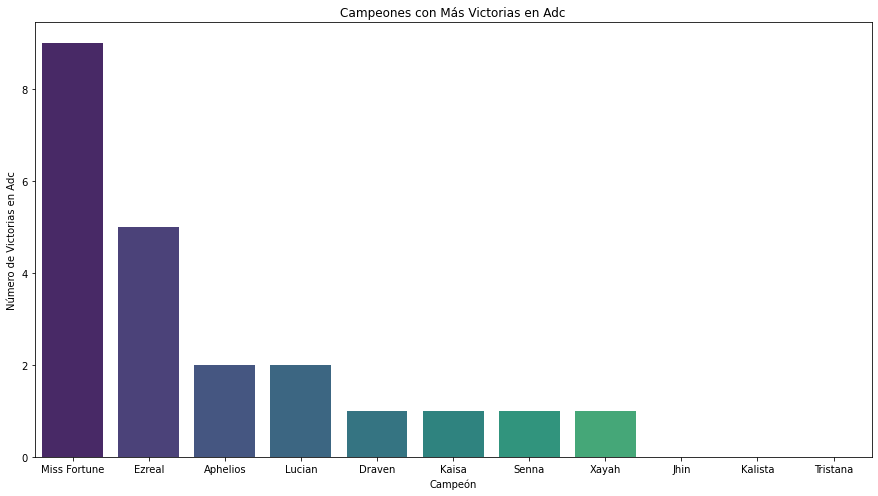

In [23]:
victorias_adc = df[df['Position'] == 'Adc']
campeones_mas_victorias_adc = victorias_adc.groupby('Champion')['Win'].sum().reset_index()
campeones_mas_victorias_adc = campeones_mas_victorias_adc.sort_values(by='Win', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Champion', y='Win', data=campeones_mas_victorias_adc, palette='viridis')

plt.xlabel('Campeón')
plt.ylabel('Número de Victorias en Adc')
plt.title('Campeones con Más Victorias en Adc')

## Campeon con más victorias en la posicion de Support

Text(0.5, 1.0, 'Campeones con Más Victorias en Support')

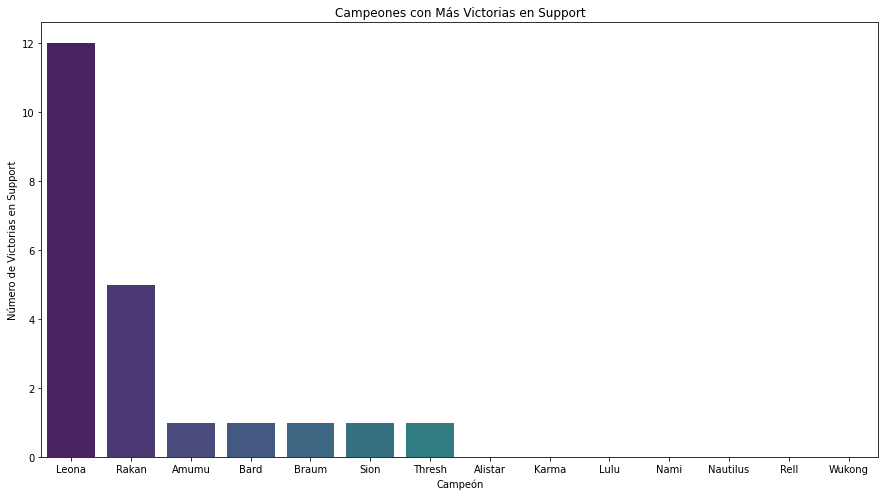

In [24]:
victorias_support = df[df['Position'] == 'Support']
campeones_mas_victorias_support = victorias_support.groupby('Champion')['Win'].sum().reset_index()
campeones_mas_victorias_support = campeones_mas_victorias_support.sort_values(by='Win', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Champion', y='Win', data=campeones_mas_victorias_support, palette='viridis')

plt.xlabel('Campeón')
plt.ylabel('Número de Victorias en Support')
plt.title('Campeones con Más Victorias en Support')

## El oro ganado me hace ganar partidas?

In [25]:
dfmatches = pd.read_csv("Play-ins-Matches.csv")

print(dfmatches.head())

     Match MatchTeams Team     Player Opponent Player Opponent Position  \
0  Match12    GSvsUOL   GS      Crazy      UOL            Boss      Top   
1  Match12    GSvsUOL   GS     Mojito      UOL        Ahahacik   Jungle   
2  Match12    GSvsUOL   GS     Bolulu      UOL          Nomanz      Mid   
3  Match12    GSvsUOL   GS      Alive      UOL        Argonavt      Adc   
4  Match12    GSvsUOL   GS  Zergsting      UOL          Santas  Support   

  Position Opponent      Champion Champion Opponent  ...  \
0               Top          Gwen           Camille  ...   
1            Jungle         Talon           Trundle  ...   
2               Mid  Twisted Fate           Leblanc  ...   
3               Adc  Miss Fortune            Ezreal  ...   
4           Support         Rakan             Amumu  ...   

   Wards interactions Opponent  Dragons For  Dragons For Opponent  \
0                           16            4                     0   
1                           22            4       

### Victorias de cada equipo

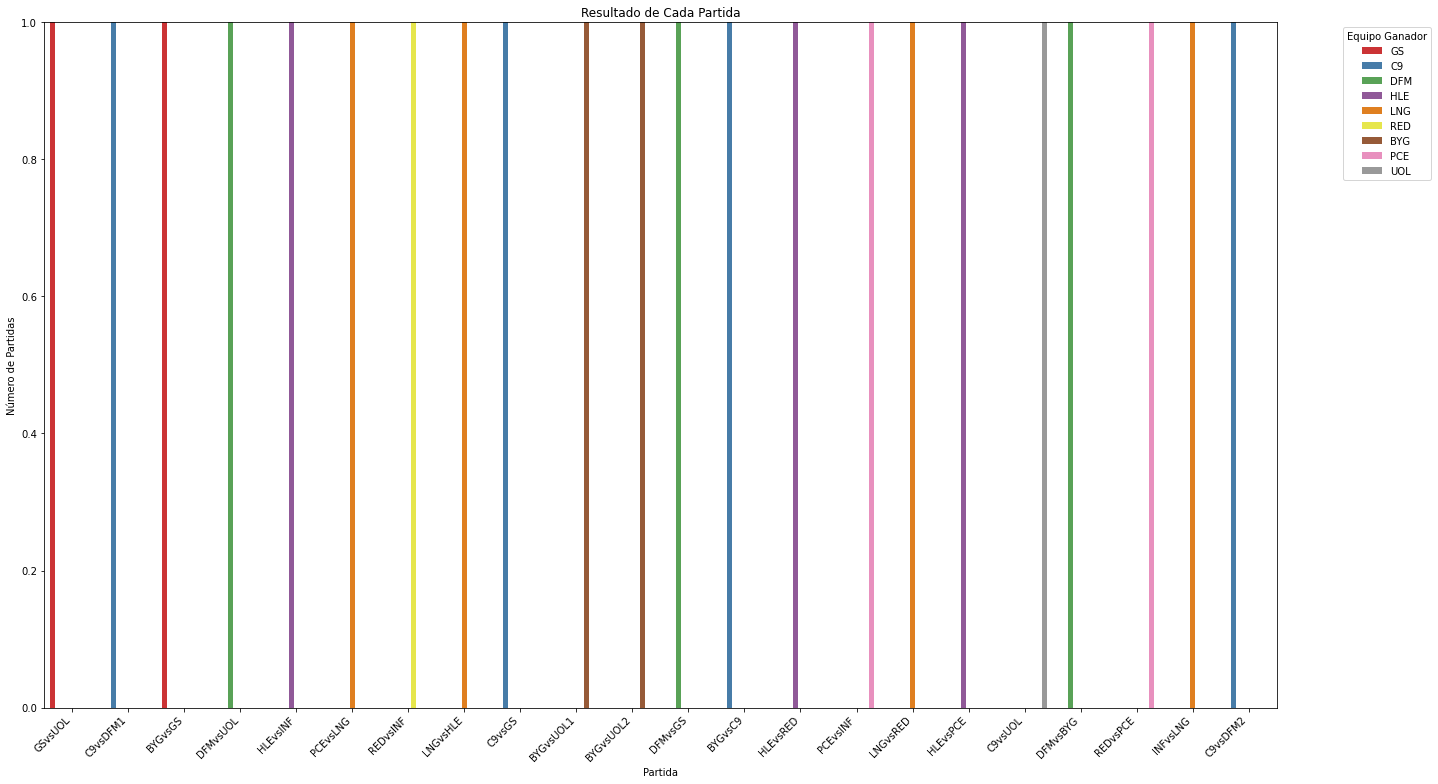

In [26]:
plt.figure(figsize=(20, 11))
sns.countplot(x='MatchTeams', hue='Winner', data=dfmatches, palette='Set1')

plt.xlabel('Partida')
plt.ylabel('Número de Partidas')
plt.title('Resultado de Cada Partida')

# Configuración de leyenda
plt.legend(title='Equipo Ganador', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')

plt.ylim(0,1)

plt.tight_layout()
plt.show()

## Comparamos las partidas y el oro generado en cada una de ellas

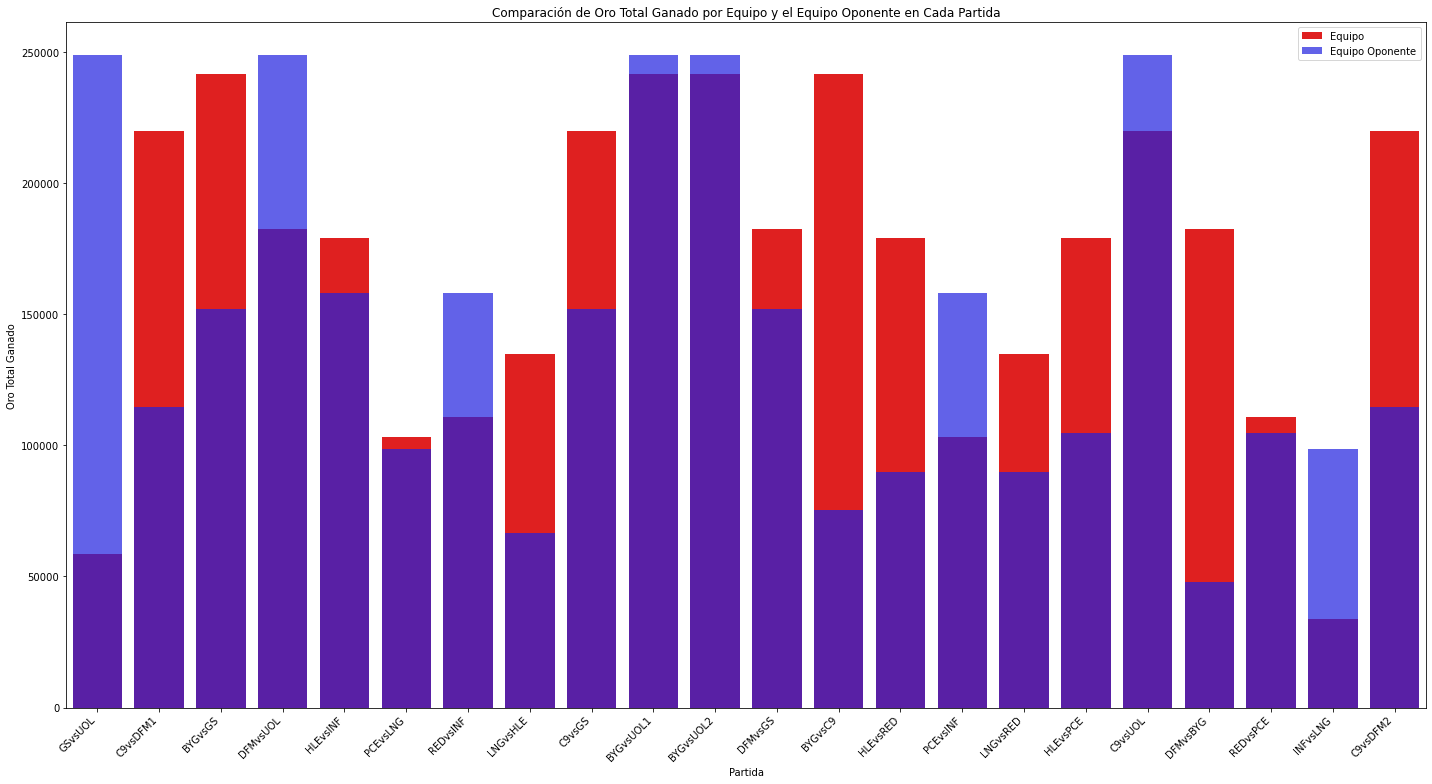

In [27]:
dfmatches['OroTotalEquipo'] = dfmatches.groupby('Team')['Gold Earned'].transform('sum')
dfmatches['OroTotalOponente'] = dfmatches.groupby('Opponent')['Gold Earned Opponent'].transform('sum')

plt.figure(figsize=(20, 11))
barplot = sns.barplot(x='MatchTeams', y='OroTotalEquipo', data=dfmatches, color='red', label='Equipo')
barplot = sns.barplot(x='MatchTeams', y='OroTotalOponente', data=dfmatches, color='blue', label='Equipo Oponente', alpha=0.7)

plt.xlabel('Partida')
plt.ylabel('Oro Total Ganado')
plt.title('Comparación de Oro Total Ganado por Equipo y el Equipo Oponente en Cada Partida')

# Configuración de leyenda
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Equipos que ganaron en desventaja de oro:   GS,GS,LNG,RED,BYG,BYG,C9,PCE,PCE TOTAL PARTIDAS= 9
### Equipos que ganaron con ventaja:   C9,UOL,HLE,LNG,C9,DFM,HLE,LNG,HLE,UOL,DFM,LNG,C9 TOTAL PARTIDAS= 13

### Analizando estos dos graficos si bien en la mayoria de casos el equipo con mayor cantidad de oro total gana la partida existe la posibilidad de que no siempre sea asi y equipos con menor cantidad de oro han ganado sus partidas

### Cual es la posicion que tiende a generar mayor oro en la partida

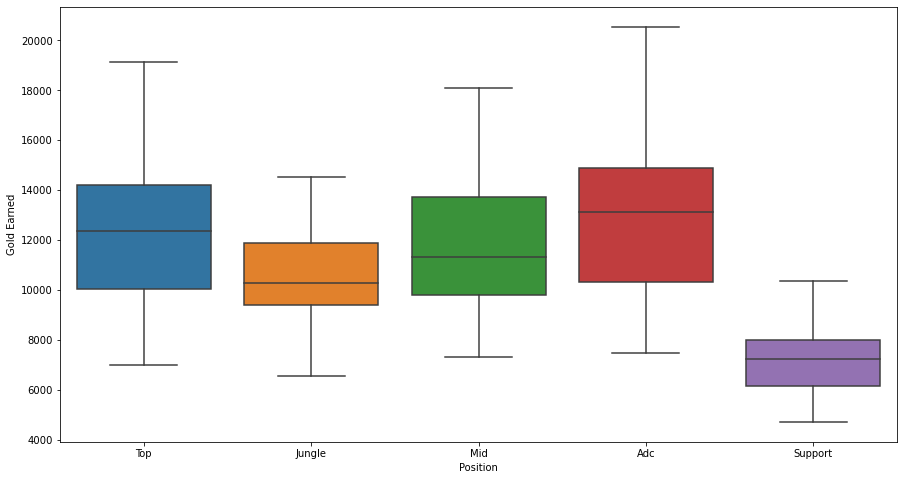

In [28]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="Position", y="Gold Earned", data=df)

### Top 10 campeones con mas oro ganado

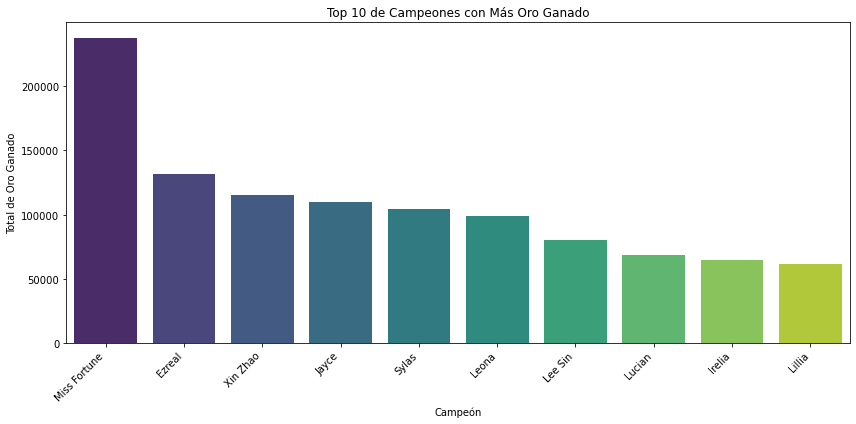

In [29]:
oro_por_campeon = df.groupby('Champion')['Gold Earned'].sum().reset_index()
top_10_oro = oro_por_campeon.sort_values(by='Gold Earned', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Champion', y='Gold Earned', data=top_10_oro, palette='viridis')

plt.xlabel('Campeón')
plt.ylabel('Total de Oro Ganado')
plt.title('Top 10 de Campeones con Más Oro Ganado')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### Posicion con mas media de asesinatos

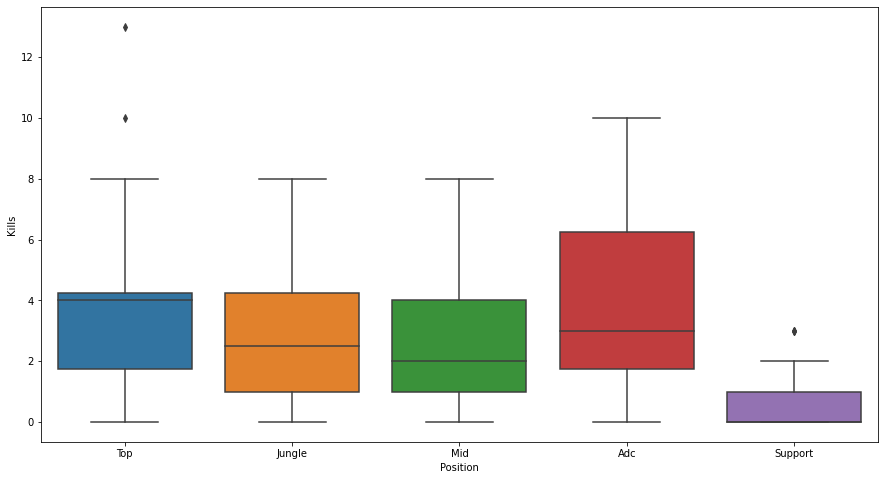

In [30]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="Position", y="Kills", data=df)

### Top 10 campeones con mas asesinatos

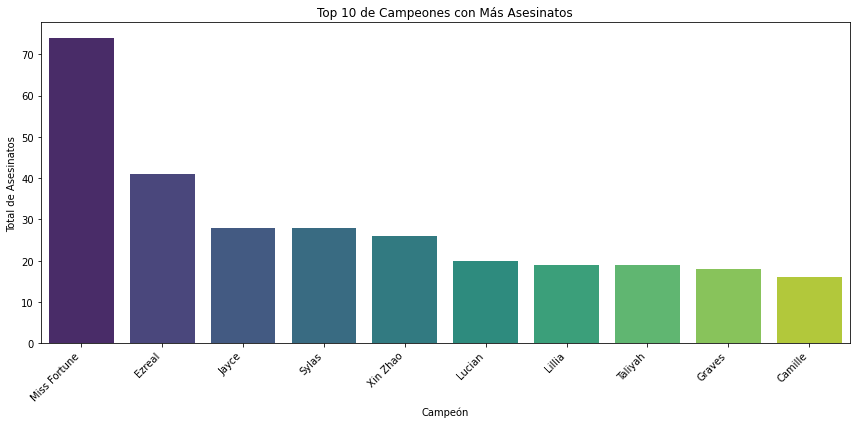

In [31]:
asesinatos_por_campeon = df.groupby('Champion')['Kills'].sum().reset_index()
top_10_asesinatos = asesinatos_por_campeon.sort_values(by='Kills', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Champion', y='Kills', data=top_10_asesinatos, palette='viridis')

plt.xlabel('Campeón')
plt.ylabel('Total de Asesinatos')
plt.title('Top 10 de Campeones con Más Asesinatos')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Modelo Predictivo

### Predecir cual es la composicion de campeones que debo llevar para una victoria mas probable (Random Forest)

In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

### Primer intento de modelo predictivo

In [33]:
X = df[['Champion', 'Position']]
y = df['Win']

# Codificar variables categóricas
X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precisión del modelo: {accuracy}')
print(f'Recall del modelo: {recall}')
print(f'F1-score del modelo: {f1}')

Precisión del modelo: 0.5454545454545454
Recall del modelo: 0.3888888888888889
F1-score del modelo: 0.411764705882353


### Ajuste de modelo con hiperparametros de el random forest

In [34]:
X = df[['Champion', 'Position']]
y = df['Win']

X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Definir el modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],      # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]     # Número mínimo de muestras requeridas en cada hoja del árbol
}

# Configurar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda de cuadrícula en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados por la búsqueda de cuadrícula
best_params = grid_search.best_params_

# Imprimir los mejores hiperparámetros
print(f"Mejores hiperparámetros encontrados: {best_params}")

# Utilizar el modelo con los mejores hiperparámetros para hacer predicciones en el conjunto de prueba
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluar el rendimiento del modelo ajustado en el conjunto de prueba
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo ajustado: {accuracy}')

Mejores hiperparámetros encontrados: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Precisión del modelo ajustado: 0.45454545454545453


### Matriz de confusion

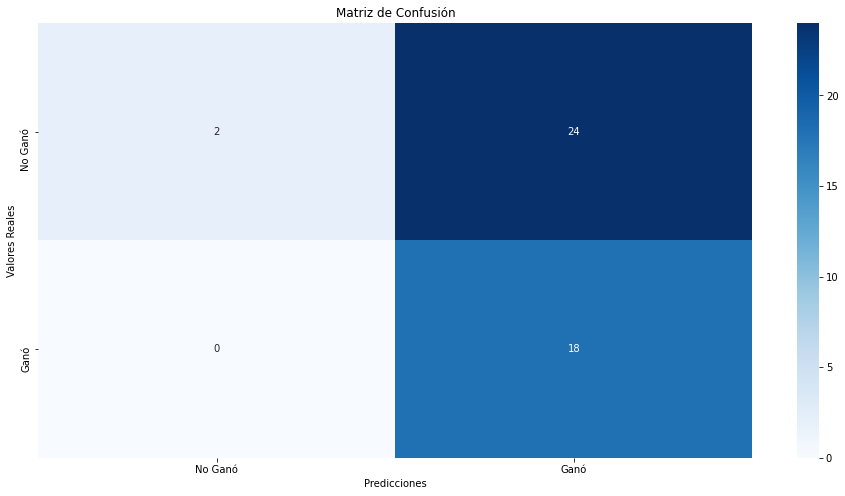

In [35]:
predictions = best_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Crear un mapa de calor (heatmap) con seaborn
plt.figure(figsize=(16, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Ganó', 'Ganó'], yticklabels=['No Ganó', 'Ganó'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

### En el analizis podemos ver que se hicieron 44 predicciones y nuestro modelo acerto 20 de ellas en los escenarios positivos, pero en los escenarios negativos no tuvo un buen desempeño, la precision de este modelo es de el 45.45% por lo cual necesitaria de más variables para lograr mas precision en el objetivo
